In [3]:
import os
os.getcwd()

'C:\\Users\\SRADHA\\Desktop\\Project\\Advertising'

In [4]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
# read data into the dataframe
data=pd.read_csv('Advertising.csv')

In [6]:
# displaying top 5 rows of the data
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
# print the shape of the dataframe
data.shape

(200, 4)

In [9]:
# Missing terms
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There are no missing values.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:ylabel='TV'>

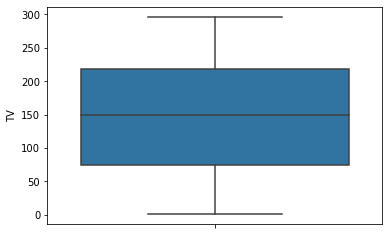

In [12]:
# Outlier Handling
sns.boxplot(y='TV',data=data)

<AxesSubplot:ylabel='radio'>

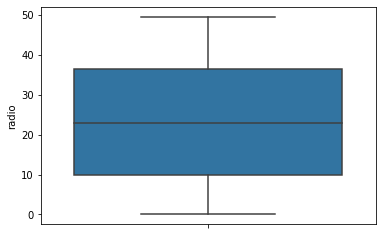

In [13]:
sns.boxplot(y='radio',data=data)

<AxesSubplot:ylabel='newspaper'>

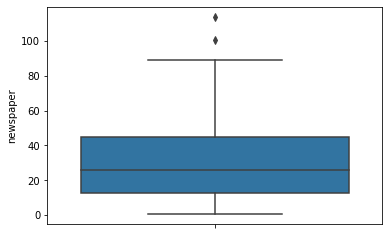

In [14]:
sns.boxplot(y='newspaper',data=data)

In [24]:
Q1=data['newspaper'].quantile(0.25)
Q3=data['newspaper'].quantile(0.75)
IQR=Q3-Q1
pos_outlier=Q3+1.5*IQR
neg_outlier=Q1-1.5*IQR

data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

<AxesSubplot:ylabel='newspaper'>

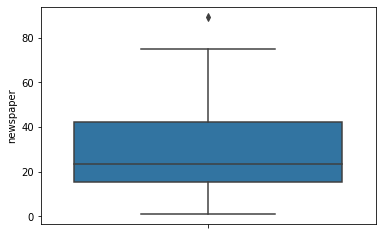

In [25]:
sns.boxplot(y='newspaper',data=data)

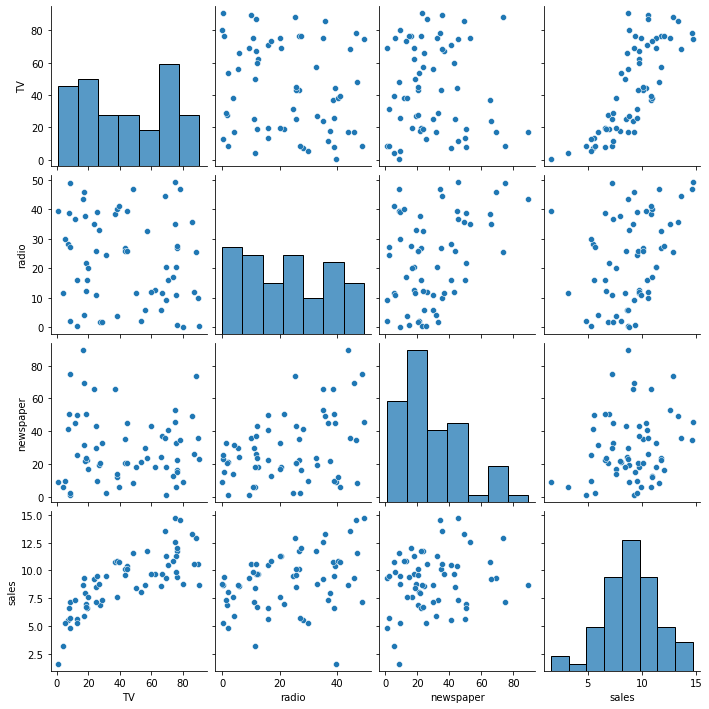

In [26]:
sns.pairplot(data)

<AxesSubplot:xlabel='sales', ylabel='Density'>

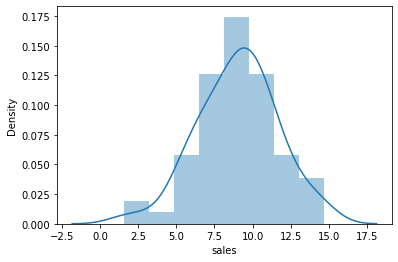

In [27]:
sns.distplot(data['sales'])

In [28]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,-0.172969,-0.041435,0.778398
radio,-0.172969,1.000000,0.382790,0.354637
newspaper,-0.041435,0.382790,1.000000,0.202025
sales,0.778398,0.354637,0.202025,1.000000


<AxesSubplot:>

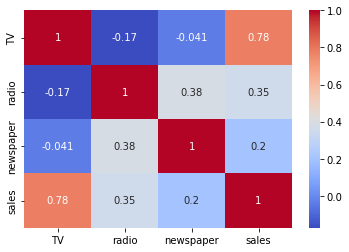

In [29]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [30]:
# Splitting the data into independent and dependent variable
x=data.iloc[:,0:3]
y=data['sales']

In [31]:
x.head()

,TV,radio,newspaper
1,44.5,39.3,45.1
2,17.2,45.9,69.3
5,8.7,48.9,75.0
6,57.5,32.8,23.5
8,8.6,2.1,1.0


In [32]:
y.head()

1    10.4
2     9.3
5     7.2
6    11.8
8     4.8
Name: sales, dtype: float64

# Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [40]:
x1=pd.DataFrame(x_scaled)
x1.head()

,0,1,2
0,0.015453,1.101527,0.785682
1,-0.983711,1.544825,1.999802
2,-1.294806,1.746324,2.285773
3,0.491245,0.664946,-0.297995
4,-1.298466,-1.397059,-1.426826


In [37]:
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable=x_scaled

vif=pd.DataFrame()

vif['Variance Inflation Factor']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['Features']=x.columns

In [38]:
vif

,Variance Inflation Factor,Features
0,1.031606,TV
1,1.206641,radio
2,1.172554,newspaper


Since no value is more than 5, there is no multicolinearity in this dataset.

In [66]:
# Splitting the data into traint and test data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,train_size=0.75,random_state=101)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(47, 3)
(16, 3)
(47,)
(16,)


# Linear Regression Model

In [67]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [68]:
lm.intercept_

9.013428298618358

In [69]:
lm.coef_

array([2.21312383, 1.31626684, 0.22637317])

In [70]:
coef_df=pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coef_df

,Coefficient
TV,2.213124
radio,1.316267
newspaper,0.226373


In [71]:
y_pred_lm=lm.predict(x_test)
y_pred_lm

array([ 5.68827958,  6.63002552,  8.96392832, 11.88636319, 10.22264241,
        8.1036258 ,  9.33193844,  6.64192772,  8.47764226, 11.87743993,
        6.41903918,  9.32245768, 11.34729165,  9.46220062, 13.94773536,
        6.32344516])

In [78]:
y_pred_train_lm=lm.predict(x_train)
y_pred_train_lm

array([ 9.5113973 ,  9.21981904, 10.23073284,  9.5056139 ,  4.47145343,
       11.63056951,  9.98319158, 12.96309771,  8.39171525,  7.09791303,
       10.70960711, 10.90840374, 11.48474803,  7.80757568,  7.72982589,
        9.95542049,  8.36872363,  9.86024496,  5.9344446 ,  6.66226283,
       10.67904346, 10.68070334,  6.19321857,  6.74075224, 12.86011608,
       11.24825911,  6.12246193,  7.83556893,  4.50663204,  5.9082312 ,
        9.33446791,  9.22590885,  8.71139697, 10.67538892, 13.32451402,
       13.75081824,  3.97786557,  9.68486625,  7.88120579,  9.45228465,
        9.08982586,  5.19880504,  6.27183272,  8.86362214,  7.83756772,
       14.0213022 , 10.69657972])

In [79]:
# Test score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_lm)

0.9017724921037334

In [80]:
# Training score
r2_score(y_train,y_pred_train_lm)

0.8397186666453809

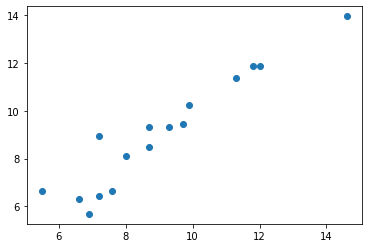

In [76]:
plt.scatter(y_test,y_pred_lm)

<AxesSubplot:xlabel='sales', ylabel='Density'>

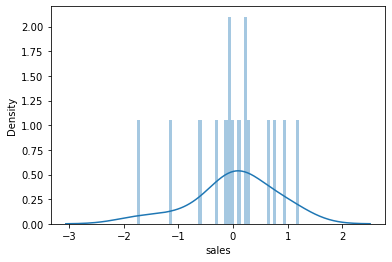

In [77]:
sns.distplot((y_test-y_pred_lm),bins=50)

# Decision Tree Model

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=101)

In [97]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [98]:
y_pred_train_dt=dt.predict(x_train)
y_pred_test_dt=dt.predict(x_test)

In [99]:
print(r2_score(y_train,y_pred_train_dt))
print(r2_score(y_test,y_pred_test_dt))

1.0
0.7234550844774488


# Random Forest Model

In [102]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=10000)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10000)

In [103]:
y_pred_train_rf=rf.predict(x_train)
y_pred_test_rf=rf.predict(x_test)

In [104]:
print(r2_score(y_train,y_pred_train_rf))
print(r2_score(y_test,y_pred_test_rf))

0.9827588690660272
0.7137056075860153
